#Regressão Linear Simples (Usando a base v1)

Há como construir um modelo que calcule o melhor salário para o funcionário?

In [2]:
#Pacotes para manipulação de dados
import numpy as np
import pandas as pd

#Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Pacotes de modelagem
import statsmodels.api as sm

In [7]:
df = pd.read_csv('base_funcionarios_v1.csv', sep=';', index_col='id')

In [8]:
df.head()

,Salario,Anos_Educ_Superior
id,,
1,5517.4,3
2,6399.9,4
3,6206.7,6
4,6060.6,4
5,6122.7,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 1 to 46
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salario             46 non-null     float64
 1   Anos_Educ_Superior  46 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [11]:
df.describe()

,Salario,Anos_Educ_Superior
count,46.000000,46.000000
mean,6969.797826,5.065217
std,1924.868873,2.839422
min,4139.500000,0.000000
25%,5818.350000,4.000000
50%,6394.750000,5.000000
75%,7972.400000,6.000000
max,12118.100000,12.000000


##Análise Exploratória


<Axes: xlabel='Anos_Educ_Superior', ylabel='Salario'>

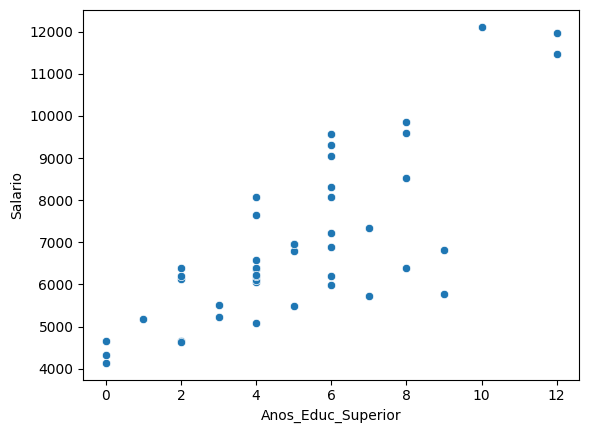

In [12]:
#Gráfico de Dispersão

sns.scatterplot(x=df.Anos_Educ_Superior, y=df.Salario)

###Correlação Linear de Pearson

In [13]:
#Correlação de Pearson

df.corr()

,Salario,Anos_Educ_Superior
Salario,1.000000,0.776992
Anos_Educ_Superior,0.776992,1.000000


<Axes: >

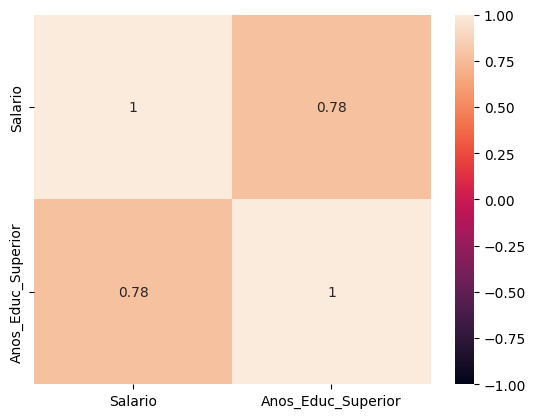

In [16]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

Quando a correlação é 1, o gráfico vai tender a formar uma reta.

<Axes: xlabel='Salario', ylabel='Salario'>

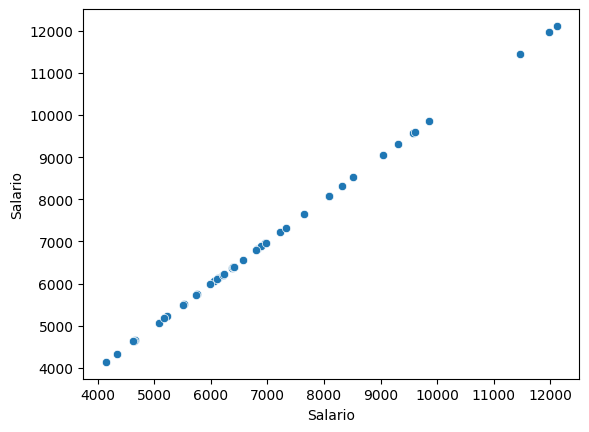

In [18]:
sns.scatterplot(x=df.Salario, y=df.Salario)

###Ajuste do Modelo de Regressão Usando a Biblioteca Statsmodels

Intercepto: valor do x que cruza o eixo y. Ex: y = 1500x-3000
y= 0 => x = 3000/1500 => x = 2, então intercepto é igual a 2


In [25]:
y= df.Salario

df['intercepto'] = 1

x=df[['intercepto', 'Anos_Educ_Superior']]



In [27]:
#OLS: ordinary least squares
modelo = sm.OLS(y, x)

Explicação do OLS
- Adj. R-Squared: apresenta em porcentagem o peso do x sobre o y (ou o quanto o x explica o y);

- P > |T|: (? não entendi);

- coef (ou análise dos coeficientes): aqui é onde brilha, o intercepto será o salário de quem está no eixo y, já o Anos_Educ_Superior é o que incrementa a cada unidade

In [34]:
modelo
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     67.03
Date:                Sat, 05 Apr 2025   Prob (F-statistic):           2.18e-10
Time:                        15:37:39   Log-Likelihood:                -391.36
No. Observations:                  46   AIC:                             786.7
Df Residuals:                      44   BIC:                             790.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4301.7990    372

<Axes: xlabel='Anos_Educ_Superior', ylabel='Salario'>

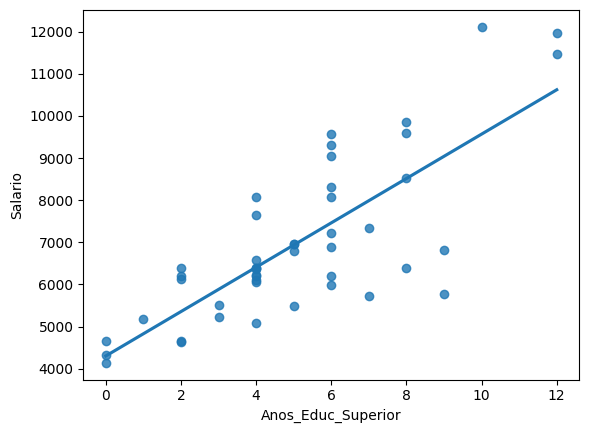

In [35]:
sns.regplot(x=df.Anos_Educ_Superior, y=df.Salario, ci=None)

# Regressão Linear Múltipla



In [42]:
df = pd.read_csv('base_funcionarios_v2.csv', sep=';', index_col='id')

In [43]:
df.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa
id,,,
1,5517.4,3,3
2,6399.9,4,6
3,6206.7,6,3
4,6060.6,4,5
5,6122.7,2,9


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 1 to 46
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salario             46 non-null     float64
 1   Anos_Educ_Superior  46 non-null     int64  
 2   Tempo_Empresa       46 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.4 KB


In [46]:
df.describe()

,Salario,Anos_Educ_Superior,Tempo_Empresa
count,46.000000,46.000000,46.000000
mean,6969.797826,5.065217,10.326087
std,1924.868873,2.839422,7.601328
min,4139.500000,0.000000,0.000000
25%,5818.350000,4.000000,5.250000
50%,6394.750000,5.000000,8.500000
75%,7972.400000,6.000000,17.250000
max,12118.100000,12.000000,27.000000


In [47]:
df.corr()

,Salario,Anos_Educ_Superior,Tempo_Empresa
Salario,1.000000,0.776992,0.765173
Anos_Educ_Superior,0.776992,1.000000,0.607486
Tempo_Empresa,0.765173,0.607486,1.000000


## Ajuste do modelo

In [49]:
y = df.Salario

df['intercepto'] = 1
x = df[['intercepto', 'Anos_Educ_Superior', 'Tempo_Empresa']]
modelo = sm.OLS(y, x)



In [50]:
modelo
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     61.17
Date:                Sat, 05 Apr 2025   Prob (F-statistic):           2.66e-13
Time:                        18:18:44   Log-Likelihood:                -381.67
No. Observations:                  46   AIC:                             769.3
Df Residuals:                      43   BIC:                             774.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4056.0591    309

<Axes: xlabel='Anos_Educ_Superior', ylabel='Salario'>

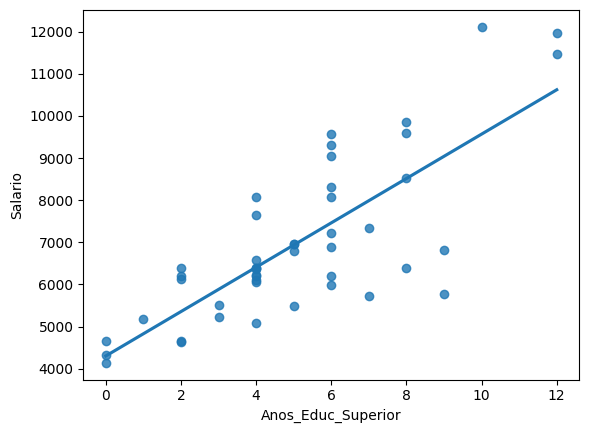

In [53]:
sns.regplot(x=df.Anos_Educ_Superior, y=df.Salario, ci=None)